In [2]:
# Reads in the results file
# graphs different metrics using micro accuracy as color

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils


"""
NOTE: keep patience and min_pct_improvement at 5, 1 for purposes of comparison

Results of the first arch search, 2427 models explored:
- all other val metrics could be perfect and you could still get as low as 90% micro val accuracy

- 1 to 2 layers, BUT was affected by bias: more layers = more chance to get an invalid combination of hyperparameters, so many fewer 4-layer models than 1-layer models were evaluated. Regardless, as pie graphs go from all models to higher performing models, the percent of 1 and 2 layer models increased, while 3 and 4 decreased.
- dropout of 0-0.6 (the range of given values) was all high performing
- stride was 1 80% of the time for highest models on layer 1, rarely 2, never 3. On layer 2, it was 50/50 stride 1 or 2.
- kernel size was mostly 5-9, sometimes 11, not too often 3
- pooling kernel size ranged across all given values, 0-3
- output channels were mostly large, 128 and 256, 
- batch size was mostly 16 or 32, but 64 was not uncommon

next steps:
- raise conv channels range and make more granular, [5, 6, 7, 8, 9]
"""

2024-03-27 11:41:06.883782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'\nNOTE: keep patience and min_pct_improvement at 5, 1 for purposes of comparison\n\nResults of the first arch search, 2427 models explored:\n- all other val metrics could be perfect and you could still get as low as 90% micro val accuracy\n\n- 1 to 2 layers, BUT was affected by bias: more layers = more chance to get an invalid combination of hyperparameters, so many fewer 4-layer models than 1-layer models were evaluated. Regardless, as pie graphs go from all models to higher performing models, the percent of 1 and 2 layer models increased, while 3 and 4 decreased.\n- dropout of 0-0.6 (the range of given values) was all high performing\n- stride was 1 80% of the time for highest models on layer 1, rarely 2, never 3. On layer 2, it was 50/50 stride 1 or 2.\n- kernel size was mostly 5-9, sometimes 11, not too often 3\n- pooling kernel size ranged across all given values, 0-3\n- output channels were mostly large, 128 and 256, \n- batch size was mostly 16 or 32, but 64 was not uncommon\n\

MEAN: 8494.678414096916


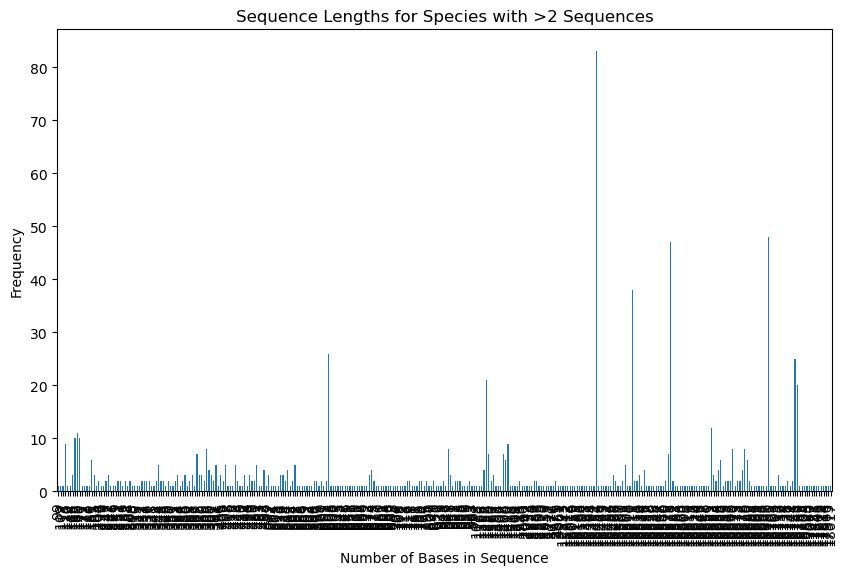

                                   min    max
Species                                      
Ablennes hians                     430  16825
Acipenser brevirostrum             253  16680
Acipenser oxyrinchus               109    961
Alectis ciliaris                   169  16570
Alepisaurus ferox                  169  16194
Alosa aestivalis                   582    717
Alosa pseudoharengus               363  16646
Alosa sapidissima                  173  16741
Aluterus scriptus                  761  16451
Amblyraja radiata                  967  16783
Ameiurus nebulosus                 356   2657
Anarhichas lupus                 16510  16516
Anguilla rostrata                   99  16682
Antigonia capros                   168  16508
Argyropelecus aculeatus            168    391
Aspidophoroides monopterygius      168    712
Auxis rochei                      1256  16503
Balistes capriscus                 308    800
Bathytoshia centroura              680    689
Benthosema glaciale               

In [13]:
overall_df = pd.read_csv('./datasets/train.csv', sep=',')
overall_df = utils.remove_species_with_too_few_sequences(
            overall_df, 'Species', 2, False
        )
overall_df['seq_length'] = overall_df['Sequence'].str.len()
print(f"MEAN: {overall_df['seq_length'].mean()}")

plt.figure(figsize=(10,6))
overall_df['seq_length'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Bases in Sequence')
plt.ylabel('Frequency')
plt.title('Sequence Lengths for Species with >2 Sequences')
plt.show()
sequence_stats = overall_df.groupby('Species')['seq_length'].agg(['min', 'max'])

# Print the species with the minimum and maximum sequence length
print(sequence_stats)

In [9]:
df = pd.read_csv('results.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_sorted = df.sort_values(['val_macro_f1-score', 'val_micro_accuracy'], ascending=False)
# df_sorted.to_csv('results.csv', index=False)
df = df_sorted
df = df[df['k_iters'] >= 5]
df.head(1000)

/tmp/ipykernel_1236372/3647057041.py:1: DtypeWarning: Columns (22,35,36,41,43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('results.csv')


val_macro_f1-score  val_macro_recall  val_micro_accuracy  \
0                   1.0               1.0            0.985049   
1                   1.0               1.0            0.983991   
2                   1.0               1.0            0.982928   
3                   1.0               1.0            0.982916   
4                   1.0               1.0            0.982916   
5                   1.0               1.0            0.982916   
6                   1.0               1.0            0.982916   
7                   1.0               1.0            0.982916   
8                   1.0               1.0            0.982910   
9                   1.0               1.0            0.981869   
10                  1.0               1.0            0.981864   
11                  1.0               1.0            0.981858   
12                  1.0               1.0            0.981858   
13                  1.0               1.0            0.981852   
14                  1.0               1.0            0.981852   
15                  1.0               1.0            0.981852   
16                  1.0               1.0            0.981852   
17                  1.0               1.0            0.981852   
18                  1.0               1.0            0.981847   
19                  1.0               1.0            0.981847   
20                  1.0               1.0            0.981847   
21                  1.0               1.0            0.981847   
22                  1.0               1.0            0.981847   
23                  1.0               1.0            0.981847   
24                  1.0               1.0            0.981847   
25                  1.0               1.0            0.981841   
26                  1.0               1.0            0.980806   
27                  1.0               1.0            0.980800   
28                  1.0               1.0            0.980800   
29                  1.0               1.0            0.980788   
30                  1.0               1.0            0.980788   
31                  1.0               1.0            0.980788   
32                  1.0               1.0            0.980783   
33                  1.0               1.0            0.980783   
34                  1.0               1.0            0.980783   
35                  1.0               1.0            0.980783   
36                  1.0               1.0            0.980783   
37                  1.0               1.0            0.980783   
38                  1.0               1.0            0.980783   
39                  1.0               1.0            0.980777   
40                  1.0               1.0            0.980777   
41                  1.0               1.0            0.980777   
42                  1.0               1.0            0.980777   
43                  1.0               1.0            0.980777   
44                  1.0               1.0            0.980777   
45                  1.0               1.0            0.980771   
46                  1.0               1.0            0.980771   
47                  1.0               1.0            0.979730   
48                  1.0               1.0            0.979725   
49                  1.0               1.0            0.979725   
50                  1.0               1.0            0.979725   
51                  1.0               1.0            0.979725   
52                  1.0               1.0            0.979725   
53                  1.0               1.0            0.979725   
54                  1.0               1.0            0.979725   
55                  1.0               1.0            0.979719   
56                  1.0               1.0            0.979719   
57                  1.0               1.0            0.979719   
58                  1.0               1.0            0.979719   
59                  1.0               1.0            0.979719   
60                  1.0               1.

In [35]:
# Not useful since it doesn't relate the combinations to accuracy, only to each other
# Select the columns
columns = ['batch_size', 'learning_rate', 'val_micro_accuracy']
for i in range(1, 5):
    columns.extend([f'layer{i}_input_channels', f'layer{i}_output_channels', f'layer{i}_conv_kernel', f'layer{i}_stride', f'layer{i}_padding', f'layer{i}_dropout', f'layer{i}_pool_kernel'])

df_selected = df[columns]

# Calculate the correlation matrix
corr = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False, fmt=".2f")

# Display the plot
plt.show()

In [33]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on the accuracy
df_95 = df[df['val_micro_accuracy'] > 0.95]
df_80 = df[df['val_micro_accuracy'] > 0.80]
df_50 = df[df['val_micro_accuracy'] > 0.50]
df_10 = df[df['val_micro_accuracy'] > 0.10]
df_00 = df[df['val_micro_accuracy'] > 0.00]

# Calculate the percentages for each filtered DataFrame
nan_95_percent = [(1 - df_95['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_80_percent = [(1 - df_80['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_50_percent = [(1 - df_50['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_10_percent = [(1 - df_10['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_00_percent = [(1 - df_00['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]

# Create labels
labels = ['1-layer Models', '2-layer Models', '3-layer Models', '4-layer Models']

# Create the pie charts
fig, axs = plt.subplots(1, 5, figsize=(18, 6))

# 95% accuracy
axs[0].pie(nan_95_percent, labels=labels, autopct='%1.1f%%')
axs[0].set_title('Models with > 95% Accuracy')

# 80% accuracy
axs[1].pie(nan_80_percent, labels=labels, autopct='%1.1f%%')
axs[1].set_title('Models with > 80% Accuracy')

# 50% accuracy
axs[2].pie(nan_50_percent, labels=labels, autopct='%1.1f%%')
axs[2].set_title('Models with > 50% Accuracy')

# 10% accuracy
axs[3].pie(nan_10_percent, labels=labels, autopct='%1.1f%%')
axs[3].set_title('Models with > 10% Accuracy')

# all explored models
axs[4].pie(nan_00_percent, labels=labels, autopct='%1.1f%%')
axs[4].set_title('All Models Evaluated')

plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2231353246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['batch_size', 'learning_rate']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2231353246.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('batch_size', 'learning_rate', 'val_micro_accuracy')


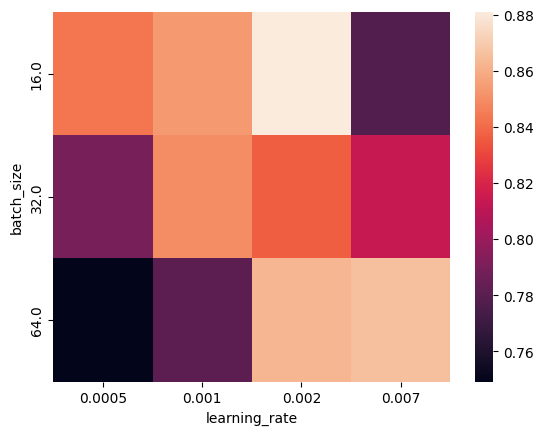

In [14]:
df_agg = df.groupby(['batch_size', 'learning_rate']).mean().reset_index()
pivot_table = df_agg.pivot('batch_size', 'learning_rate', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2964924092.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer1_input_channels', 'layer1_output_channels']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2964924092.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('layer1_input_channels', 'layer1_output_channels', 'val_micro_accuracy')


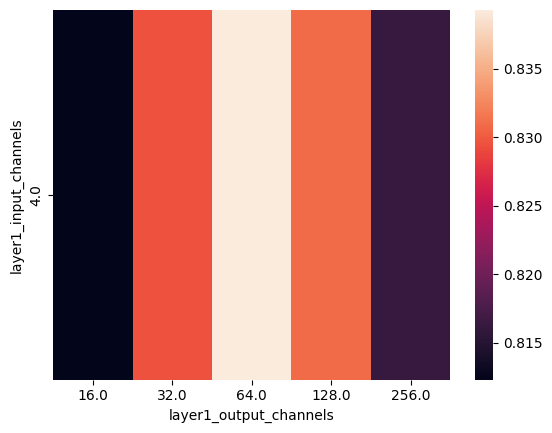

In [15]:
df_agg = df.groupby(['layer1_input_channels', 'layer1_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer1_input_channels', 'layer1_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2657535664.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer2_input_channels', 'layer2_output_channels']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2657535664.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('layer2_input_channels', 'layer2_output_channels', 'val_micro_accuracy')


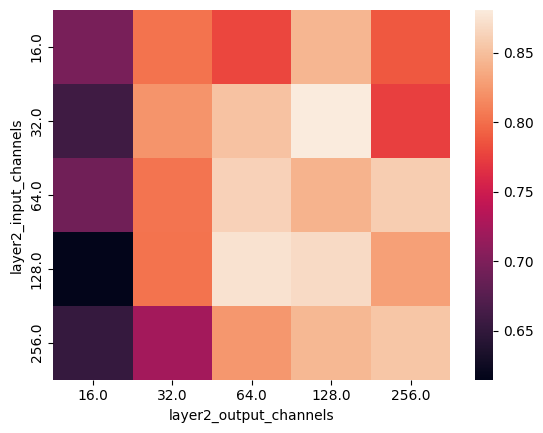

In [16]:
df_agg = df.groupby(['layer2_input_channels', 'layer2_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer2_input_channels', 'layer2_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\3544496150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer3_input_channels', 'layer3_output_channels']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\3544496150.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('layer3_input_channels', 'layer3_output_channels', 'val_micro_accuracy')


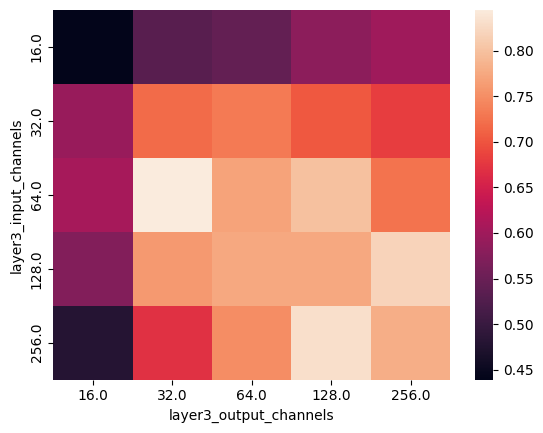

In [17]:
df_agg = df.groupby(['layer3_input_channels', 'layer3_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer3_input_channels', 'layer3_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

In [18]:
df_agg = df.groupby(['layer4_input_channels', 'layer4_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer4_input_channels', 'layer4_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\262091021.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer4_input_channels', 'layer4_output_channels']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\262091021.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('layer4_input_channels', 'layer4_output_channels', 'val_micro_accuracy')


In [19]:
df_agg = df.groupby(['layer1_conv_kernel', 'layer1_conv_kernel']).mean().reset_index()
pivot_table = df_agg.pivot('layer1_conv_kernel', 'layer1_conv_kernel', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\3647119536.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer1_conv_kernel', 'layer1_conv_kernel']).mean().reset_index()


ValueError: cannot insert layer1_conv_kernel, already exists

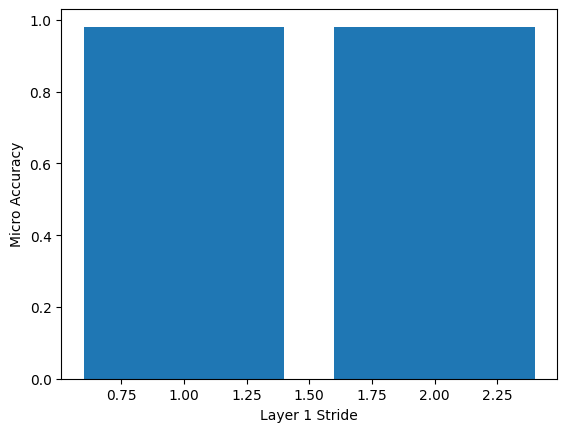

In [ ]:
plt.bar(df['layer1_stride'], df['val_micro_accuracy'])
plt.xlabel('Layer 1 Stride')
plt.ylabel('Micro Accuracy')
plt.show()

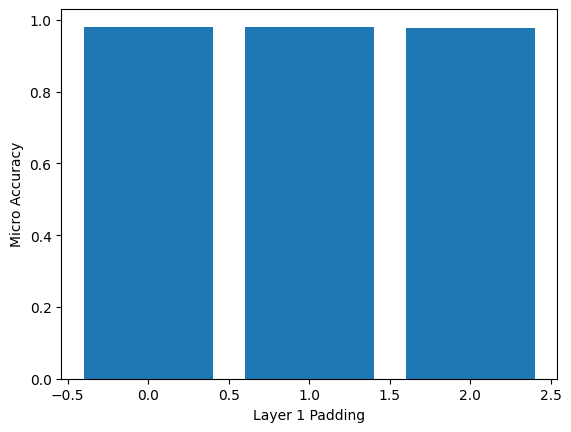

In [ ]:
plt.bar(df['layer1_padding'], df['val_micro_accuracy'])
plt.xlabel('Layer 1 Padding')
plt.ylabel('Micro Accuracy')
plt.show()

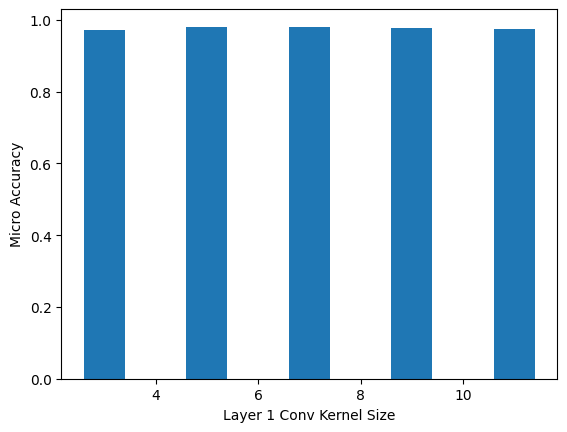

In [ ]:
plt.bar(df['layer1_conv_kernel'], df['val_micro_accuracy'])
plt.xlabel('Layer 1 Conv Kernel Size')
plt.ylabel('Micro Accuracy')
plt.show()

In [ ]:
df_agg = df.groupby(['layer1_input_channels', 'layer1_conv_kernel']).mean().reset_index()
pivot_table = df_agg.pivot('layer1_input_channels', 'layer1_conv_kernel', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

layer1_input_channels	layer1_output_channels	layer1_conv_kernel	layer1_stride	layer1_padding	layer1_dropout	layer1_pool_kernel

SyntaxError: invalid syntax (2131687882.py, line 6)